<a href="https://colab.research.google.com/github/DXH30/FinalProject/blob/master/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount Drive

In [0]:
#mount google drive
from google.colab import drive
drive.mount('/content/data')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/data


# Mempersiapkan Model

Using TensorFlow backend.
W0831 01:47:03.782788 140025488803712 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0831 01:47:03.830467 140025488803712 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0831 01:47:03.838645 140025488803712 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0831 01:47:04.143342 140025488803712 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:148: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instea

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100)               44400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
activation_1 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 44,501
Trainable params: 44,501
Non-trainable params: 0
_________________________________________________________________


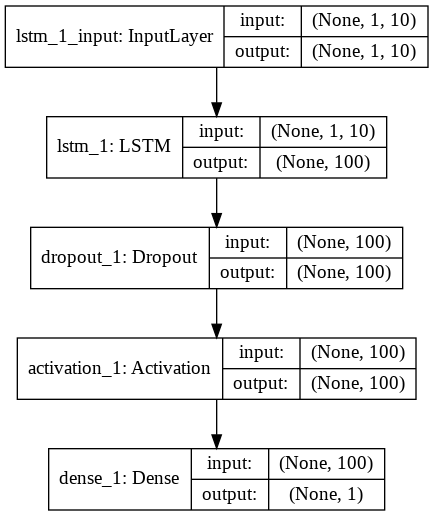

In [0]:
from keras.models import Sequential
from keras.layers import LSTM, RNN, Embedding, Dense, Activation, TimeDistributed, SpatialDropout1D
from keras import optimizers
from keras import metrics
import numpy as np

bobotneris = '/content/data/My Drive/VirusData/nerisLSTM.hs5'
bobotrbot = '/content/data/My Drive/VirusData/rbotLSTM.hs5'
bobotsvchosta = '/content/data/My Drive/VirusData/svchostaLSTM.hs5'

hisneris = '/content/data/My Drive/VirusData/nerisLSTM.pkl'
hisrbot = '/content/data/My Drive/VirusData/rbotLSTM.pkl'
hissvchosta = '/content/data/My Drive/VirusData/svchostaLSTM.pkl'

sbobotneris = '/content/data/My Drive/VirusData/snerisLSTM.hs5'
sbobotrbot = '/content/data/My Drive/VirusData/srbotLSTM.hs5'
sbobotsvchosta = '/content/data/My Drive/VirusData/ssvchostaLSTM.hs5'

shisneris = '/content/data/My Drive/VirusData/snerisLSTM.pkl'
shisrbot = '/content/data/My Drive/VirusData/srbotLSTM.pkl'
shissvchosta = '/content/data/My Drive/VirusData/ssvchostaLSTM.pkl'

from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense, Activation, TimeDistributed, Dropout, LSTM
from keras import optimizers
from keras import metrics
from keras.utils import plot_model
model = Sequential()
model.add(LSTM(100, input_shape=(1,10)))
model.add(Dropout(0.4))
# model.add(TimeDistributed(Dense(100)))
model.add(Activation('sigmoid'))
model.add(Dense(1))
optm = optimizers.Adam(lr=0.001, clipnorm=0.5)
model.compile(optimizer=optm,loss='mae',metrics=['accuracy', metrics.mae, metrics.categorical_accuracy])
model.summary()
plot_model(model, to_file='/content/data/My Drive/VirusData/LSTMModel.png', show_shapes=True)

# Bentuk Data
Data terdiri dari beberapa vektor variabel yang bersifat eksogen (bersifat berhubungan tapi memiliki bentuk yang berbeda)

## Data svchosta

In [0]:
# binetflow path svchosta
import csv
line_count = 0
svchostadatapath = '/content/data/My Drive/VirusData/3svchosta/6/capture20110816.binetflow'
svc_traffic_list = []
StartTime_list = []
Dur_list = []
Proto_list = []
SrcAddr_list = []
Sport_list = []
Dir_list = []
DstAddr_list = []
Dport_list = []
State_list = []
sTos_list = []
dTos_list = []
TotPkts_list = []
TotBytes_list = []
SrcBytes_list = []
Label_list = []

with open(svchostadatapath,'r') as svclabel:
  csvReader = csv.reader(svclabel, delimiter=',')
  line_count = 0
  for row in csvReader:
    if line_count == 0:
      print(f'Kolomnya : {",".join(row)}')
      line_count += 1
    else:
      StartTime = row[0]
      Dur = row[1]
      Proto = row[2]
      SrcAddr = row[3]
      Sport = row[4]
      Dir = row[5]
      DstAddr = row[6]
      Dport = row[7]
      State = row[8]
      sTos = row[9]
      dTos = row[10]
      TotPkts = row[11]
      TotBytes = row[12]
      SrcBytes = row[13]
      Label = row[14]
      svc_traffic_list.append([StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label])
      StartTime_list.append([row[0]])
      Dur_list.append([row[1]])
      Proto_list.append([row[2]])
      SrcAddr_list.append([row[3]])
      Sport_list.append([row[4]])
      Dir_list.append([row[5]])
      DstAddr_list.append([row[6]])
      Dport_list.append([row[7]])
      State_list.append([row[8]])
      sTos_list.append([row[9]])
      dTos_list.append([row[10]])
      TotPkts_list.append([row[11]])
      TotBytes_list.append([row[12]])
      SrcBytes_list.append([row[13]])
      Label_list.append([row[14]])
      line_count += 1

Kolomnya : StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label


## Data rbot

In [0]:
# binetflow path svchosta
import csv
line_count = 0
rbothostadatapath = '/content/data/My Drive/VirusData/2rbot/capture20110812.binetflow'
rbot_traffic_list = []
StartTime_list = []
Dur_list = []
Proto_list = []
SrcAddr_list = []
Sport_list = []
Dir_list = []
DstAddr_list = []
Dport_list = []
State_list = []
sTos_list = []
dTos_list = []
TotPkts_list = []
TotBytes_list = []
SrcBytes_list = []
Label_list = []

with open(rbothostadatapath,'r') as rbotlabel:
  csvReader = csv.reader(rbotlabel, delimiter=',')
  line_count = 0
  for row in csvReader:
    if line_count == 0:
      print(f'Kolomnya : {",".join(row)}')
      line_count += 1
    else:
      StartTime = row[0]
      Dur = row[1]
      Proto = row[2]
      SrcAddr = row[3]
      Sport = row[4]
      Dir = row[5]
      DstAddr = row[6]
      Dport = row[7]
      State = row[8]
      sTos = row[9]
      dTos = row[10]
      TotPkts = row[11]
      TotBytes = row[12]
      SrcBytes = row[13]
      Label = row[14]
      rbot_traffic_list.append([StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label])
#       StartTime_list.append([row[0]])
#       Dur_list.append([row[1]])
#       Proto_list.append([row[2]])
#       SrcAddr_list.append([row[3]])
#       Sport_list.append([row[4]])
#       Dir_list.append([row[5]])
#       DstAddr_list.append([row[6]])
#       Dport_list.append([row[7]])
#       State_list.append([row[8]])
#       sTos_list.append([row[9]])
#       dTos_list.append([row[10]])
#       TotPkts_list.append([row[11]])
#       TotBytes_list.append([row[12]])
#       SrcBytes_list.append([row[13]])
#       Label_list.append([row[14]])
      line_count += 1

Kolomnya : StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label


## Data neris

In [0]:
# binetflow path svchosta
import csv
line_count = 0
nerishostadatapath = '/content/data/My Drive/VirusData/1neris/capture20110810.binetflow'
neris_traffic_list = []
StartTime_list = []
Dur_list = []
Proto_list = []
SrcAddr_list = []
Sport_list = []
Dir_list = []
DstAddr_list = []
Dport_list = []
State_list = []
sTos_list = []
dTos_list = []
TotPkts_list = []
TotBytes_list = []
SrcBytes_list = []
Label_list = []

with open(nerishostadatapath,'r') as nerislabel:
  csvReader = csv.reader(nerislabel, delimiter=',')
  line_count = 0
  for row in csvReader:
    if line_count == 0:
      print(f'Kolomnya : {",".join(row)}')
      line_count += 1
    else:
      StartTime = row[0]
      Dur = row[1]
      Proto = row[2]
      SrcAddr = row[3]
      Sport = row[4]
      Dir = row[5]
      DstAddr = row[6]
      Dport = row[7]
      State = row[8]
      sTos = row[9]
      dTos = row[10]
      TotPkts = row[11]
      TotBytes = row[12]
      SrcBytes = row[13]
      Label = row[14]
      neris_traffic_list.append([StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label])
      StartTime_list.append([row[0]])
      Dur_list.append([row[1]])
      Proto_list.append([row[2]])
      SrcAddr_list.append([row[3]])
      Sport_list.append([row[4]])
      Dir_list.append([row[5]])
      DstAddr_list.append([row[6]])
      Dport_list.append([row[7]])
      State_list.append([row[8]])
      sTos_list.append([row[9]])
      dTos_list.append([row[10]])
      TotPkts_list.append([row[11]])
      TotBytes_list.append([row[12]])
      SrcBytes_list.append([row[13]])
      Label_list.append([row[14]])
      line_count += 1

Kolomnya : StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label


In [0]:
from pandas import DataFrame
from pandas import read_csv
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np
import tensorflow as tf
from numpy.random import seed
from numpy import concatenate
from numpy import diff
from tensorflow import set_random_seed
seed(1) # Agar nilai random dari numpy dapat di regenerate kembali
set_random_seed(2) # Agar nilai random dari tensorflow Keras dapat di regenerate kembali
# Agar set_random_seed bisa dipakai script harus di jalankan di Python Native

# contoh dari numpy
# print([np.random.random(), np.random.random(), np.random.random()]);
# sehingga jika di jalankan akan menghasilkan nilai random yang sama karena ketika di jalankan seed(1) mereset nilai random

# contoh dari tensorflow
# a = tf.random_uniform([1], seed=1)
# b = tf.random_normal([1])

# # Repeatedly running this block with the same graph will generate the same
# # sequence of values for 'a', but different sequences of values for 'b'.
# print("Session 1")
# with tf.Session() as sess1:
#   print(sess1.run(a))  # generates 'A1'
#   print(sess1.run(a))  # generates 'A2'
#   print(sess1.run(b))  # generates 'B1'
#   print(sess1.run(b))  # generates 'B2'

## svchosta Dataset

In [0]:
import pandas as pd
svcdataset = pd.DataFrame(svc_traffic_list, columns=['StartTime', # Hanya dipakai untuk menyatakan waktu
                                                  'Dur', # Dipakai untuk mengamati durasi trafik 1 paket berlangsung
                                                  'Proto', # Dipakai untuk mengamati Protokol yang digunakan (TCP, UDP, ICMP)
                                                  'SrcAddr', # Dipakai untuk mengamati Source Addr (Varians nya saja)
                                                  'Sport', # Dipakai untuk mengamati Source Port (Varians nya saja)
                                                  'Dir', # Dipakai untuk mengamati Direction (From, To, FormTo)
                                                  'DstAddr', # Dipakai untuk mengamati Destination Addr (Varians nya saja)
                                                  'Dport', # Dipakai untuk mengamati Destination Port (Varians nya saja)
                                                  'State', # Dipakai untuk mengamati State packet (diterima di tolak)
                                                  'sTos', # Dipakai untuk mengamati source Time of State
                                                  'dTos', # Dipakai untuk mengamati destination Time of State
                                                  'TotPkts', # Total Packets
                                                  'TotBytes', # Total Bytes 
                                                  'SrcBytes', # Source Bytes
                                                  'Label' # Targets
                                                 ])
del(svc_traffic_list)

In [0]:
svcdataset[svcdataset['SrcAddr'].isin(['67.210.234.162'])]

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
0,2011/08/16 10:04:03.820235,0.286751,tcp,67.210.234.162,3597,->,147.32.86.98,80,S_RA,0,0,4,244,124,flow=Background-TCP-Attempt
1,2011/08/16 10:04:04.106986,0.280358,tcp,67.210.234.162,3597,->,147.32.86.98,80,S_RA,0,0,4,244,124,flow=Background-TCP-Attempt
2,2011/08/16 10:04:04.387344,0.280039,tcp,67.210.234.162,3597,->,147.32.86.98,80,S_RA,0,0,4,244,124,flow=Background-TCP-Attempt
13667,2011/08/16 10:04:04.667383,0.000404,tcp,67.210.234.162,3597,->,147.32.86.98,80,S_,0,0,1,62,62,flow=Background-TCP-Attempt
353650,2011/08/16 11:19:40.854310,92.479156,tcp,67.210.234.162,2802,->,147.32.86.129,80,S_,0,,45,2790,2790,flow=Background-TCP-Attempt


## rbot Dataset

In [0]:
import pandas as pd
rbotdataset = pd.DataFrame(rbot_traffic_list, columns=['StartTime', # Hanya dipakai untuk menyatakan waktu
                                                  'Dur', # Dipakai untuk mengamati durasi trafik 1 paket berlangsung
                                                  'Proto', # Dipakai untuk mengamati Protokol yang digunakan (TCP, UDP, ICMP)
                                                  'SrcAddr', # Dipakai untuk mengamati Source Addr (Varians nya saja)
                                                  'Sport', # Dipakai untuk mengamati Source Port (Varians nya saja)
                                                  'Dir', # Dipakai untuk mengamati Direction (From, To, FormTo)
                                                  'DstAddr', # Dipakai untuk mengamati Destination Addr (Varians nya saja)
                                                  'Dport', # Dipakai untuk mengamati Destination Port (Varians nya saja)
                                                  'State', # Dipakai untuk mengamati State packet (diterima di tolak)
                                                  'sTos', # Dipakai untuk mengamati source Time of State
                                                  'dTos', # Dipakai untuk mengamati destination Time of State
                                                  'TotPkts', # Total Packets
                                                  'TotBytes', # Total Bytes 
                                                  'SrcBytes', # Source Bytes
                                                  'Label' # Targets
                                                 ])
del(rbot_traffic_list)

## neris Dataset

In [0]:
import pandas as pd
nerisdataset = pd.DataFrame(neris_traffic_list, columns=['StartTime', # Hanya dipakai untuk menyatakan waktu
                                                  'Dur', # Dipakai untuk mengamati durasi trafik 1 paket berlangsung
                                                  'Proto', # Dipakai untuk mengamati Protokol yang digunakan (TCP, UDP, ICMP)
                                                  'SrcAddr', # Dipakai untuk mengamati Source Addr (Varians nya saja)
                                                  'Sport', # Dipakai untuk mengamati Source Port (Varians nya saja)
                                                  'Dir', # Dipakai untuk mengamati Direction (From, To, FormTo)
                                                  'DstAddr', # Dipakai untuk mengamati Destination Addr (Varians nya saja)
                                                  'Dport', # Dipakai untuk mengamati Destination Port (Varians nya saja)
                                                  'State', # Dipakai untuk mengamati State packet (diterima di tolak)
                                                  'sTos', # Dipakai untuk mengamati source Time of State
                                                  'dTos', # Dipakai untuk mengamati destination Time of State
                                                  'TotPkts', # Total Packets
                                                  'TotBytes', # Total Bytes 
                                                  'SrcBytes', # Source Bytes
                                                  'Label' # Targets
                                                 ])
del(neris_traffic_list)

In [0]:
# yang perlu di konversi
# StartTime -> TimeStamp
# Dur -> Kuantisasi
# Proto -> Kategorikal 1,2,3,...
# SrcAddr -> IntHex -> varians / time frame (x step sebelumnya-n), jika perubahan varians makin banyak dan makin sedikit -> ?
# Sport -> Int -> varians / time frame (x step sebelumnya-n), jika perubahan varians makin banyak dan makin sedikit -> ?
# Dir -> Kategorikal
# DstAddr -> IntHex -> varians / time frame (x step sebelumnya-n), jika perubahan varians makin banyak dan makin sedikit -> ?
# Dport -> Int -> varians / time frame (x step sebelumnya-n), jika perubahan varians makin banyak dan makin sedikit -> ?
# State -> Kategorikal 1,2,3,...
# sTos ->
# dTos ->
# TotPkts ->
# TotBytes ->
# SrcBytes ->

# yang saya rasa perlu di training hanya 
# kuantisasi Dur, Kategorikal Proto, Varians SrcAddr, Varians SrcPort, Kategorikal Dir, Varians DstAddr, Varians DstPort
# kenapa TotPkts, TotBytes, SrcBytes tidak dipakai ? karena botnet tidak melakukan flooding size namun flooding request
# data_train = dataset.drop(columns=['StartTime', 'sTos', 'dTos', 'TotPkts', 'TotBytes', 'SrcBytes'], axis=1)

# untuk menghemat memori kita perlu hapus datasetnya
# del(dataset)

Kolomnya : StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label


# Mempersiapkan Input (Kuantisasi + Normalisasi)

## Input svchosta

In [0]:
StartTime_list = svcdataset['StartTime'].values.tolist()
Dur_list = svcdataset['Dur'].values.tolist()
Proto_list = svcdataset['Proto'].values.tolist()
SrcAddr_list = svcdataset['SrcAddr'].values.tolist()
Sport_list = svcdataset['Sport'].values.tolist()
Dir_list = svcdataset['Dir'].values.tolist()
DstAddr_list = svcdataset['DstAddr'].values.tolist()
Dport_list = svcdataset['Dport'].values.tolist()
State_list = svcdataset['State'].values.tolist()
sTos_list = svcdataset['sTos'].values.tolist()
dTos_list = svcdataset['dTos'].values.tolist()
TotPkts_list = svcdataset['TotPkts'].values.tolist()
TotBytes_list = svcdataset['TotBytes'].values.tolist()
SrcBytes_list = svcdataset['SrcBytes'].values.tolist()
Label_list = svcdataset['Label'].values.tolist()

In [0]:
import socket
import struct
import numpy as np

def ip2int(addr):
    return struct.unpack("!I", socket.inet_aton(addr))[0]

def int2ip(addr):
    return socket.inet_ntoa(struct.pack("!I", addr))

from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Membuat Data Label kedalam data intrusi dan data benign
# Proton, SrcAddrn, DstAddrn, Sportn, Dportn, Dirn, TotPktsn, TotBytesn, SrcBytesn, Labeln, Label_dual

# Melakukan Normalisasi untuk semua data Input
# 1.1 Proto di angka kan
Proton = LabelEncoder()
Proton.fit(Proto_list)
Proton = Proton.transform(Proto_list)

# 1.2 Proto di normalisasi
scaler = MinMaxScaler()
Proton = Proton.reshape(-1, 1)
scaler.fit(Proton)
Proton = scaler.transform(Proton)
# Tipe data terakhirnya numpy array

# 2.1 SrcAddrn di angka kan

SrcAddrn = []
for i in range(len(SrcAddr_list)):
  try:
    SrcAddrn.append(ip2int(SrcAddr_list[i][0]))
  except:
    SrcAddrn.append(0)

# 2.2 SrcAddrn di normalisasi
SrcAddre = MinMaxScaler()
SrcAddrn = np.array(SrcAddrn).reshape(-1, 1)
SrcAddre.fit(SrcAddrn)
SrcAddre = SrcAddre.transform(SrcAddrn)
SrcAddrn = SrcAddre

# 3.1 DstAddrn di angka kan
DstAddrn = []
for i in range(len(DstAddr_list)):
  try:
    DstAddrn.append(ip2int(DstAddr_list[i][0]))
  except:
    DstAddrn.append(0)

# 3.2 DstAddrn di normalisasi
DstAddre = MinMaxScaler()
DstAddrn = np.array(DstAddrn).reshape(-1, 1)
DstAddre.fit(DstAddrn)
DstAddre = DstAddre.transform(DstAddrn)
DstAddrn = DstAddre

# 4.1 Sportn di angka kan
Sportn = []
for i in range(len(Sport_list)):
  try:
    Sportn.append(float(Sport_list[i][0]))
  except:
    Sportn.append(float(0))

Sports = Sportn

# 4.2 Sportn di normalisasi
Sporte = MinMaxScaler()
Sportn = np.array(Sports).reshape(-1, 1)
Sporte.fit(Sportn)
Sporte = Sporte.transform(Sportn)
Sportn = Sporte

# 5.1 Dportn di angka kan
Dportn = []
for i in range(len(Dport_list)):
  try:
    Dportn.append(float(Dport_list[i][0]))
  except:
    Dportn.append(float(0))

Dports = Dportn

# 5.2 Dportn di normalisasi
Dporte = MinMaxScaler()
Dportn = np.array(Dports).reshape(-1, 1)
Dporte.fit(Dportn)
Dporte = Dporte.transform(Dportn)
Dportn = Dporte

# 6.1 Dirn di angka kan
Dirn = LabelEncoder()
Dirn.fit(Dir_list)
Dirn = Dirn.transform(Dir_list)

# 6.2 Dirn di normalisasi
Dire = MinMaxScaler()
Dirn = np.array(Dirn).reshape(-1, 1)
Dire.fit(Dirn)
Dirn = Dire.transform(Dirn)

# 7.1 TotPktsn di angka kan
TotPktsn = []
for i in range(len(TotPkts_list)):
  try:
    TotPktsn.append(float(TotPkts_list[i][0]))
  except:
    TotPktsn.append(float(0))
    
# 7.2 TotPktsn di normalisasi
TotPktse = MinMaxScaler()
TotPktsn = np.array(TotPktsn).reshape(-1, 1)
TotPktse.fit(TotPktsn)
TotPktsn = TotPktse.transform(TotPktsn)

# 8.1 TotBytesn di angka kan
TotBytesn = []
for i in range(len(TotBytes_list)):
  try:
    TotBytesn.append(float(TotBytes_list[i][0]))
  except:
    TotBytesn.append(float(0))

# 8.2 TotBytesn di normalisasi
TotBytese = MinMaxScaler()
TotBytesn = np.array(TotBytesn).reshape(-1, 1)
TotBytese.fit(TotBytesn)
TotBytesn = TotPktse.transform(TotBytesn)

# 9.1 SrcBytesn di angka kan
SrcBytesn = []
for i in range(len(SrcBytes_list)):
  try:
    SrcBytesn.append(float(SrcBytes_list[i][0]))
  except:
    SrcBytesn.append(float(0))


# 9.2 SrcBytesn di normalisasi
SrcBytese = MinMaxScaler()
SrcBytesn = np.array(SrcBytesn).reshape(-1, 1)
SrcBytese.fit(SrcBytesn)
SrcBytesn = TotPktse.transform(SrcBytesn)

# Target
# 10.1 Label di dual
import re
Label_dual = []
pattern = re.compile("^.*[Mm]al.*")
for lists in Label_list:
  if re.match(pattern, lists):
    Label_dual.append([1])
  else:
    Label_dual.append([0])

# 10.2 Label di angka kan
Labele = LabelEncoder()
Labele.fit(Label_list)
Labeln = Labele.transform(Label_list)

# 10.3 Label di normaliasi
Labele = MinMaxScaler()
Labeln = np.array(Labeln).reshape(-1, 1)
Labele.fit(Labeln)
Labeln = Labele.transform(Labeln)

# Definisikan Dua jenis Malicious dan Benign

In [0]:
Label_dual.where([1])

AttributeError: ignored

### Sentiment Analysis

In [0]:
import pandas as pd
# Proton, SrcAddrn, DstAddrn, Sportn, Dportn, Dirn, TotPktsn, TotBytesn, SrcBytesn, Labeln, Label_dual
datasetn = pd.DataFrame({
    'Proton':Proton[:,0],
    'SrcAddrn':SrcAddrn[:,0],
    'DstAddrn':DstAddrn[:,0],
    'Sportn':Sportn[:,0],
    'Dportn':Dportn[:,0],
    'Dirn':Dirn[:,0],
    'TotPktsn':TotPktsn[:,0],
    'TotBytesn':TotBytesn[:,0],
    'SrcBytesn':SrcBytesn[:,0],
    'Labeln':Labeln[:,0],
    'Label_dual':np.array(Label_dual)[:,0]
})

# pisah jadi train set and test set
values = datasetn.values
n_sample_train = 250000
train = values[:n_sample_train, :]
test = values[n_sample_train:, :]

# Disini train_X menggunakan Kolom Proton -> Labeln, sedangkan
# Untuk train_y menggunakan Kolom Label_dual (untuk prediksi Positive Negative)
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
train_X = train_X.reshape((train_X.shape[0],1,train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(250000, 1, 10) (250000,) (308919, 1, 10) (308919,)


In [0]:
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense, Activation, TimeDistributed, Dropout, LSTM
from keras import optimizers
from keras import metrics
model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1],train_X.shape[2])))
model.add(Dropout(0.4))
# model.add(TimeDistributed(Dense(100)))
model.add(Activation('softmax'))
model.add(Dense(1))
optm = optimizers.Adam(lr=0.001, clipnorm=0.5)
model.compile(optimizer=optm,loss='mae',metrics=['accuracy', metrics.mae, metrics.categorical_accuracy])
model.summary()

# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
model.save_weights(sbobotsvchosta)
import pickle
with open(shissvchosta, 'wb') as file_pi:
        pickle.dump(history.history, file_pi)

W0805 04:44:10.198069 140578120034176 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0805 04:44:10.214967 140578120034176 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0805 04:44:10.502825 140578120034176 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0805 04:44:10.517211 140578120034176 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Ins

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100)               44400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
activation_1 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 44,501
Trainable params: 44,501
Non-trainable params: 0
_________________________________________________________________


W0805 04:44:10.869246 140578120034176 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0805 04:44:11.431934 140578120034176 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 250000 samples, validate on 308919 samples
Epoch 1/50
 - 19s - loss: 0.0113 - acc: 0.9889 - mean_absolute_error: 0.0113 - categorical_accuracy: 1.0000 - val_loss: 0.0154 - val_acc: 0.9847 - val_mean_absolute_error: 0.0154 - val_categorical_accuracy: 1.0000
Epoch 2/50
 - 17s - loss: 0.0114 - acc: 0.9889 - mean_absolute_error: 0.0114 - categorical_accuracy: 1.0000 - val_loss: 0.0157 - val_acc: 0.9847 - val_mean_absolute_error: 0.0157 - val_categorical_accuracy: 1.0000
Epoch 3/50
 - 17s - loss: 0.0114 - acc: 0.9889 - mean_absolute_error: 0.0114 - categorical_accuracy: 1.0000 - val_loss: 0.0156 - val_acc: 0.9847 - val_mean_absolute_error: 0.0156 - val_categorical_accuracy: 1.0000
Epoch 4/50
 - 18s - loss: 0.0113 - acc: 0.9889 - mean_absolute_error: 0.0113 - categorical_accuracy: 1.0000 - val_loss: 0.0153 - val_acc: 0.9847 - val_mean_absolute_error: 0.0153 - val_categorical_accuracy: 1.0000
Epoch 5/50
 - 18s - loss: 0.0113 - acc: 0.9889 - mean_absolute_error: 0.0113 - categorical_a

In [0]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

from matplotlib.pyplot import imshow
def plot_conv_weights(model, layer):
    W = model.get_layer(name=layer).get_weights()[0]
    if len(W.shape) == 4:
        W = np.squeeze(W)
        W = W.reshape((W.shape[0], W.shape[1], W.shape[2]*W.shape[3])) 
        fig, axs = plt.subplots(5,5, figsize=(8,8))
        fig.subplots_adjust(hspace = .5, wspace=.001)
        axs = axs.ravel()
        for i in range(25):
            axs[i].imshow(W[:,:,i])
            axs[i].set_title(str(i))

model.summary()
plt.figure(figsize = (20,2))
plt.imshow(model.layers[0].get_weights()[0], interpolation='nearest')
plt.title("Bobot Bias LSTM")
plt.show()
plt.figure(figsize = (20,2))
plt.imshow(model.layers[0].get_weights()[0], interpolation='nearest')
plt.title("Bobot Neuron LSTM")
plt.show()

plt.plot(model.layers[3].get_weights()[0])
plt.title("Bobot Neuron Dense (Untuk Aktivasi terakhir)")
plt.grid()
plt.show()

NameError: ignored

### Bukan Sentiment Analysis

In [0]:
import pandas as pd
# Proton, SrcAddrn, DstAddrn, Sportn, Dportn, Dirn, TotPktsn, TotBytesn, SrcBytesn, Labeln, Label_dual
datasetn = pd.DataFrame({
    'Proton':Proton[:,0],
    'SrcAddrn':SrcAddrn[:,0],
    'DstAddrn':DstAddrn[:,0],
    'Sportn':Sportn[:,0],
    'Dportn':Dportn[:,0],
    'Dirn':Dirn[:,0],
    'TotPktsn':TotPktsn[:,0],
    'TotBytesn':TotBytesn[:,0],
    'SrcBytesn':SrcBytesn[:,0],
    'Labeln':Labeln[:,0],
    'Label_dual':np.array(Label_dual)[:,0]
})

# pisah jadi train set and test set
values = datasetn.values
n_sample_train = 250000
train = values[:n_sample_train, :]
test = values[n_sample_train:, :]

# Disini diprediksi secara keseluruhan
train_X, train_y = train[:, :-1], train[:, :-1]
test_X, test_y = test[:, :-1], test[:, :-1]
train_X = train_X.reshape((train_X.shape[0],1,train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(250000, 1, 10) (250000, 10) (308919, 1, 10) (308919, 10)


In [0]:
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense, Activation, TimeDistributed, Dropout, LSTM
from keras import optimizers
from keras import metrics
model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1],train_X.shape[2])))
model.add(Dropout(0.4))
# model.add(TimeDistributed(Dense(100)))
model.add(Activation('softmax'))
model.add(Dense(10))
optm = optimizers.Adam(lr=0.001, clipnorm=0.5)
model.compile(optimizer=optm,loss='mae',metrics=['accuracy', metrics.mae, metrics.categorical_accuracy])
model.summary()

# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
#model.save_weights(simpan3)
model.save_weights(bobotsvchosta)
import pickle
with open(hissvchosta, 'wb') as file_pi:
        pickle.dump(history.history, file_pi)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 100)               44400     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
activation_2 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 45,410
Trainable params: 45,410
Non-trainable params: 0
_________________________________________________________________
Train on 250000 samples, validate on 308919 samples
Epoch 1/50
 - 19s - loss: 0.1280 - acc: 0.5064 - mean_absolute_error: 0.1280 - categorical_accuracy: 0.5064 - val_loss: 0.0770 - val_acc: 0.7642 - val_mean_absolute_error: 0.0770 - val_categorical_accuracy: 0.7642
Epoc

NameError: ignored

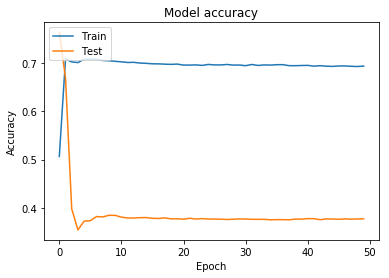

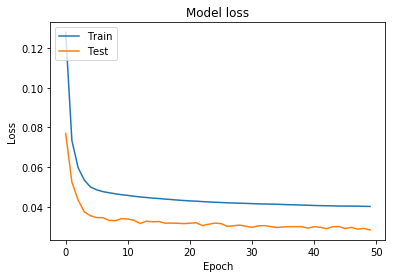

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 100)               44400     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
activation_2 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 45,410
Trainable params: 45,410
Non-trainable params: 0
_________________________________________________________________


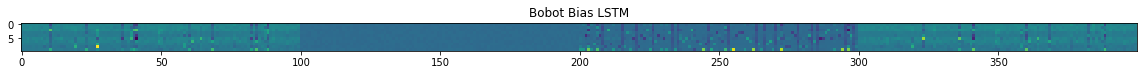

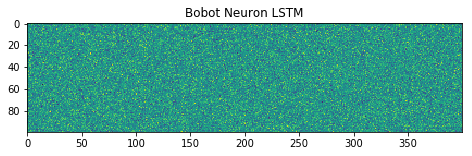

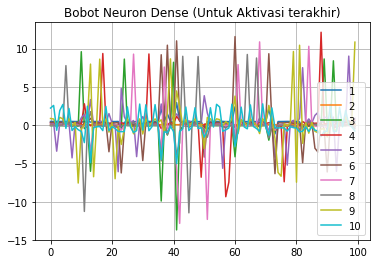

In [0]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

from matplotlib.pyplot import imshow
def plot_conv_weights(model, layer):
    W = model.get_layer(name=layer).get_weights()[0]
    if len(W.shape) == 4:
        W = np.squeeze(W)
        W = W.reshape((W.shape[0], W.shape[1], W.shape[2]*W.shape[3])) 
        fig, axs = plt.subplots(5,5, figsize=(8,8))
        fig.subplots_adjust(hspace = .5, wspace=.001)
        axs = axs.ravel()
        for i in range(25):
            axs[i].imshow(W[:,:,i])
            axs[i].set_title(str(i))

model.summary()
plt.figure(figsize = (20,2))
plt.imshow(model.layers[0].get_weights()[0], interpolation='nearest')
plt.title("Bobot Bias LSTM")
plt.show()
plt.figure(figsize = (20,2))
plt.imshow(model.layers[0].get_weights()[1], interpolation='nearest')
plt.title("Bobot Neuron LSTM")
plt.show()

plt.plot(model.layers[3].get_weights()[0])
plt.title("Bobot Neuron Dense (Untuk Aktivasi terakhir)")
plt.legend([1,2,3,4,5,6,7,8,9,10])
plt.grid()
plt.show()

## Input Rbot

In [0]:
StartTime_list = rbotdataset['StartTime'].values.tolist()
Dur_list = rbotdataset['Dur'].values.tolist()
Proto_list = rbotdataset['Proto'].values.tolist()
SrcAddr_list = rbotdataset['SrcAddr'].values.tolist()
Sport_list = rbotdataset['Sport'].values.tolist()
Dir_list = rbotdataset['Dir'].values.tolist()
DstAddr_list = rbotdataset['DstAddr'].values.tolist()
Dport_list = rbotdataset['Dport'].values.tolist()
State_list = rbotdataset['State'].values.tolist()
sTos_list = rbotdataset['sTos'].values.tolist()
dTos_list = rbotdataset['dTos'].values.tolist()
TotPkts_list = rbotdataset['TotPkts'].values.tolist()
TotBytes_list = rbotdataset['TotBytes'].values.tolist()
SrcBytes_list = rbotdataset['SrcBytes'].values.tolist()
Label_list = rbotdataset['Label'].values.tolist()
del(rbotdataset)
import socket
import struct
import numpy as np

def ip2int(addr):
    return struct.unpack("!I", socket.inet_aton(addr))[0]

def int2ip(addr):
    return socket.inet_ntoa(struct.pack("!I", addr))

from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Membuat Data Label kedalam data intrusi dan data benign
# Proton, SrcAddrn, DstAddrn, Sportn, Dportn, Dirn, TotPktsn, TotBytesn, SrcBytesn, Labeln, Label_dual

# Melakukan Normalisasi untuk semua data Input
# 1.1 Proto di angka kan
Proton = LabelEncoder()
Proton.fit(Proto_list)
Proton = Proton.transform(Proto_list)

# 1.2 Proto di normalisasi
scaler = MinMaxScaler()
Proton = Proton.reshape(-1, 1)
scaler.fit(Proton)
Proton = scaler.transform(Proton)
# Tipe data terakhirnya numpy array

# 2.1 SrcAddrn di angka kan

SrcAddrn = []
for i in range(len(SrcAddr_list)):
  try:
    SrcAddrn.append(ip2int(SrcAddr_list[i][0]))
  except:
    SrcAddrn.append(0)

# 2.2 SrcAddrn di normalisasi
SrcAddre = MinMaxScaler()
SrcAddrn = np.array(SrcAddrn).reshape(-1, 1)
SrcAddre.fit(SrcAddrn)
SrcAddre = SrcAddre.transform(SrcAddrn)
SrcAddrn = SrcAddre

# 3.1 DstAddrn di angka kan
DstAddrn = []
for i in range(len(DstAddr_list)):
  try:
    DstAddrn.append(ip2int(DstAddr_list[i][0]))
  except:
    DstAddrn.append(0)

# 3.2 DstAddrn di normalisasi
DstAddre = MinMaxScaler()
DstAddrn = np.array(DstAddrn).reshape(-1, 1)
DstAddre.fit(DstAddrn)
DstAddre = DstAddre.transform(DstAddrn)
DstAddrn = DstAddre

# 4.1 Sportn di angka kan
Sportn = []
for i in range(len(Sport_list)):
  try:
    Sportn.append(float(Sport_list[i][0]))
  except:
    Sportn.append(float(0))

Sports = Sportn

# 4.2 Sportn di normalisasi
Sporte = MinMaxScaler()
Sportn = np.array(Sports).reshape(-1, 1)
Sporte.fit(Sportn)
Sporte = Sporte.transform(Sportn)
Sportn = Sporte

# 5.1 Dportn di angka kan
Dportn = []
for i in range(len(Dport_list)):
  try:
    Dportn.append(float(Dport_list[i][0]))
  except:
    Dportn.append(float(0))

Dports = Dportn

# 5.2 Dportn di normalisasi
Dporte = MinMaxScaler()
Dportn = np.array(Dports).reshape(-1, 1)
Dporte.fit(Dportn)
Dporte = Dporte.transform(Dportn)
Dportn = Dporte

# 6.1 Dirn di angka kan
Dirn = LabelEncoder()
Dirn.fit(Dir_list)
Dirn = Dirn.transform(Dir_list)

# 6.2 Dirn di normalisasi
Dire = MinMaxScaler()
Dirn = np.array(Dirn).reshape(-1, 1)
Dire.fit(Dirn)
Dirn = Dire.transform(Dirn)

# 7.1 TotPktsn di angka kan
TotPktsn = []
for i in range(len(TotPkts_list)):
  try:
    TotPktsn.append(float(TotPkts_list[i][0]))
  except:
    TotPktsn.append(float(0))
    
# 7.2 TotPktsn di normalisasi
TotPktse = MinMaxScaler()
TotPktsn = np.array(TotPktsn).reshape(-1, 1)
TotPktse.fit(TotPktsn)
TotPktsn = TotPktse.transform(TotPktsn)

# 8.1 TotBytesn di angka kan
TotBytesn = []
for i in range(len(TotBytes_list)):
  try:
    TotBytesn.append(float(TotBytes_list[i][0]))
  except:
    TotBytesn.append(float(0))

# 8.2 TotBytesn di normalisasi
TotBytese = MinMaxScaler()
TotBytesn = np.array(TotBytesn).reshape(-1, 1)
TotBytese.fit(TotBytesn)
TotBytesn = TotPktse.transform(TotBytesn)

# 9.1 SrcBytesn di angka kan
SrcBytesn = []
for i in range(len(SrcBytes_list)):
  try:
    SrcBytesn.append(float(SrcBytes_list[i][0]))
  except:
    SrcBytesn.append(float(0))


# 9.2 SrcBytesn di normalisasi
SrcBytese = MinMaxScaler()
SrcBytesn = np.array(SrcBytesn).reshape(-1, 1)
SrcBytese.fit(SrcBytesn)
SrcBytesn = TotPktse.transform(SrcBytesn)

# Target
# 10.1 Label di dual
import re
Label_dual = []
pattern = re.compile("^.*[Mm]al.*")
for lists in Label_list:
  if re.match(pattern, lists):
    Label_dual.append([1])
  else:
    Label_dual.append([0])

# 10.2 Label di angka kan
Labele = LabelEncoder()
Labele.fit(Label_list)
Labeln = Labele.transform(Label_list)

# 10.3 Label di normaliasi
Labele = MinMaxScaler()
Labeln = np.array(Labeln).reshape(-1, 1)
Labele.fit(Labeln)
Labeln = Labele.transform(Labeln)

# Definisikan Dua jenis Malicious dan Benign

### Sentiment Analysis

In [0]:
import pandas as pd
# Proton, SrcAddrn, DstAddrn, Sportn, Dportn, Dirn, TotPktsn, TotBytesn, SrcBytesn, Labeln, Label_dual
datasetn = pd.DataFrame({
    'Proton':Proton[:,0],
    'SrcAddrn':SrcAddrn[:,0],
    'DstAddrn':DstAddrn[:,0],
    'Sportn':Sportn[:,0],
    'Dportn':Dportn[:,0],
    'Dirn':Dirn[:,0],
    'TotPktsn':TotPktsn[:,0],
    'TotBytesn':TotBytesn[:,0],
    'SrcBytesn':SrcBytesn[:,0],
    'Labeln':Labeln[:,0],
    'Label_dual':np.array(Label_dual)[:,0]
})

# pisah jadi train set and test set
values = datasetn.values
n_sample_train = 250000
train = values[:n_sample_train, :]
test = values[n_sample_train:, :]
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
train_X = train_X.reshape((train_X.shape[0],1,train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(250000, 1, 10) (250000,) (4460638, 1, 10) (4460638,)


In [0]:
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense, Activation, TimeDistributed, Dropout, LSTM
from keras import optimizers
from keras import metrics
model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1],train_X.shape[2])))
model.add(Dropout(0.4))
# model.add(TimeDistributed(Dense(100)))
model.add(Activation('softmax'))
model.add(Dense(1))
optm = optimizers.Adam(lr=0.001, clipnorm=0.5)
model.compile(optimizer=optm,loss='mae',metrics=['accuracy', metrics.mae, metrics.categorical_accuracy])
model.summary()

# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
model.save_weights(sbobotrbot)
import pickle
with open(shisrbot, 'wb') as file_pi:
        pickle.dump(history.history, file_pi)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100)               44400     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
activation_3 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 44,501
Trainable params: 44,501
Non-trainable params: 0
_________________________________________________________________
Train on 250000 samples, validate on 4460638 samples
Epoch 1/50
 - 75s - loss: 0.0158 - acc: 0.9844 - mean_absolute_error: 0.0158 - categorical_accuracy: 1.0000 - val_loss: 0.0256 - val_acc: 0.9747 - val_mean_absolute_error: 0.0256 - val_categorical_accuracy: 1.0000
Epo

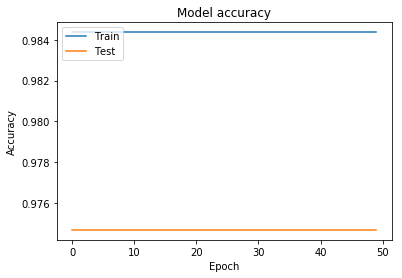

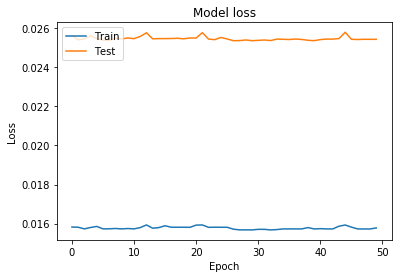

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100)               44400     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
activation_3 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 44,501
Trainable params: 44,501
Non-trainable params: 0
_________________________________________________________________


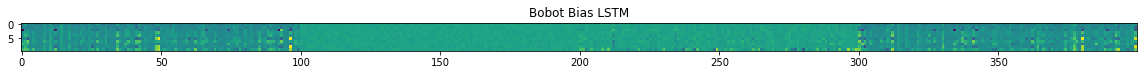

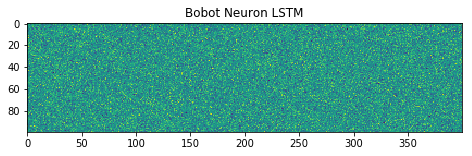

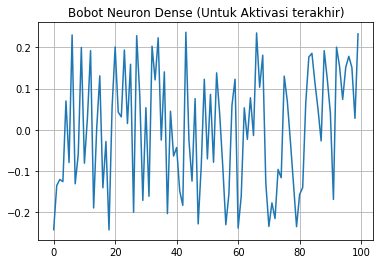

In [0]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

from matplotlib.pyplot import imshow
def plot_conv_weights(model, layer):
    W = model.get_layer(name=layer).get_weights()[0]
    if len(W.shape) == 4:
        W = np.squeeze(W)
        W = W.reshape((W.shape[0], W.shape[1], W.shape[2]*W.shape[3])) 
        fig, axs = plt.subplots(5,5, figsize=(8,8))
        fig.subplots_adjust(hspace = .5, wspace=.001)
        axs = axs.ravel()
        for i in range(25):
            axs[i].imshow(W[:,:,i])
            axs[i].set_title(str(i))

model.summary()
plt.figure(figsize = (20,2))
plt.imshow(model.layers[0].get_weights()[0], interpolation='nearest')
plt.title("Bobot Bias LSTM")
plt.show()
plt.figure(figsize = (20,2))
plt.imshow(model.layers[0].get_weights()[1], interpolation='nearest')
plt.title("Bobot Neuron LSTM")
plt.show()

plt.plot(model.layers[3].get_weights()[0])
plt.title("Bobot Neuron Dense (Untuk Aktivasi terakhir)")
plt.grid()
plt.show()

### Bukan Sentiment Analysis

In [0]:
import pandas as pd
# Proton, SrcAddrn, DstAddrn, Sportn, Dportn, Dirn, TotPktsn, TotBytesn, SrcBytesn, Labeln, Label_dual
datasetn = pd.DataFrame({
    'Proton':Proton[:,0],
    'SrcAddrn':SrcAddrn[:,0],
    'DstAddrn':DstAddrn[:,0],
    'Sportn':Sportn[:,0],
    'Dportn':Dportn[:,0],
    'Dirn':Dirn[:,0],
    'TotPktsn':TotPktsn[:,0],
    'TotBytesn':TotBytesn[:,0],
    'SrcBytesn':SrcBytesn[:,0],
    'Labeln':Labeln[:,0],
    'Label_dual':np.array(Label_dual)[:,0]
})

# pisah jadi train set and test set
values = datasetn.values
n_sample_train = 250000
train = values[:n_sample_train, :]
test = values[n_sample_train:, :]
train_X, train_y = train[:, :-1], train[:, :-1]
test_X, test_y = test[:, :-1], test[:, :-1]
train_X = train_X.reshape((train_X.shape[0],1,train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(250000, 1, 10) (250000, 10) (4460638, 1, 10) (4460638, 10)


In [0]:
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense, Activation, TimeDistributed, Dropout, LSTM
from keras import optimizers
from keras import metrics
model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1],train_X.shape[2])))
model.add(Dropout(0.4))
# model.add(TimeDistributed(Dense(100)))
model.add(Activation('softmax'))
model.add(Dense(10))
optm = optimizers.Adam(lr=0.001, clipnorm=0.5)
model.compile(optimizer=optm,loss='mae',metrics=['accuracy', metrics.mae, metrics.categorical_accuracy])
model.summary()

# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# model.save_weights(simpan3)
model.save_weights(bobotrbot)
import pickle
with open(hisrbot, 'wb') as file_pi:
        pickle.dump(history.history, file_pi)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 100)               44400     
_________________________________________________________________
dropout_4 (Dropout)          (None, 100)               0         
_________________________________________________________________
activation_4 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
Total params: 45,410
Trainable params: 45,410
Non-trainable params: 0
_________________________________________________________________
Train on 250000 samples, validate on 4460638 samples
Epoch 1/50
 - 77s - loss: 0.1242 - acc: 0.4696 - mean_absolute_error: 0.1242 - categorical_accuracy: 0.4696 - val_loss: 0.0970 - val_acc: 0.7175 - val_mean_absolute_error: 0.0970 - val_categorical_accuracy: 0.7175
Epo

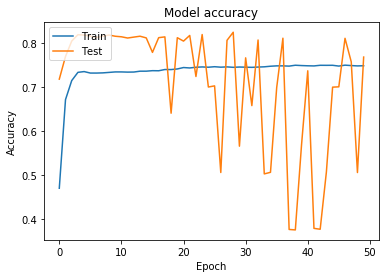

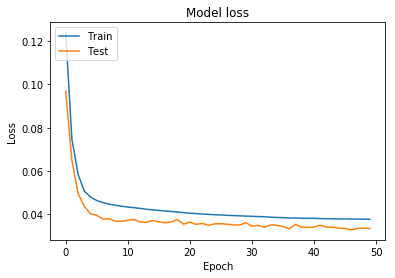

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 100)               44400     
_________________________________________________________________
dropout_4 (Dropout)          (None, 100)               0         
_________________________________________________________________
activation_4 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
Total params: 45,410
Trainable params: 45,410
Non-trainable params: 0
_________________________________________________________________


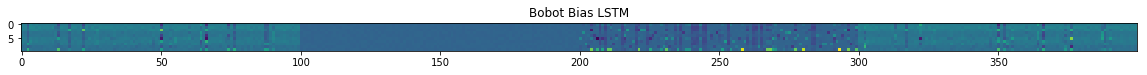

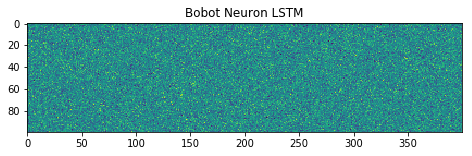

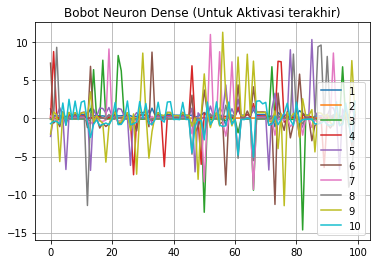

In [0]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

from matplotlib.pyplot import imshow
def plot_conv_weights(model, layer):
    W = model.get_layer(name=layer).get_weights()[0]
    if len(W.shape) == 4:
        W = np.squeeze(W)
        W = W.reshape((W.shape[0], W.shape[1], W.shape[2]*W.shape[3])) 
        fig, axs = plt.subplots(5,5, figsize=(8,8))
        fig.subplots_adjust(hspace = .5, wspace=.001)
        axs = axs.ravel()
        for i in range(25):
            axs[i].imshow(W[:,:,i])
            axs[i].set_title(str(i))

model.summary()
plt.figure(figsize = (20,2))
plt.imshow(model.layers[0].get_weights()[0], interpolation='nearest')
plt.title("Bobot Bias LSTM")
plt.show()
plt.figure(figsize = (20,2))
plt.imshow(model.layers[0].get_weights()[1], interpolation='nearest')
plt.title("Bobot Neuron LSTM")
plt.show()

plt.plot(model.layers[3].get_weights()[0])
plt.title("Bobot Neuron Dense (Untuk Aktivasi terakhir)")
plt.legend([1,2,3,4,5,6,7,8,9,10])
plt.grid()
plt.show()

## Input Neris

In [0]:
StartTime_list = nerisdataset['StartTime'].values.tolist()
Dur_list = nerisdataset['Dur'].values.tolist()
Proto_list = nerisdataset['Proto'].values.tolist()
SrcAddr_list = nerisdataset['SrcAddr'].values.tolist()
Sport_list = nerisdataset['Sport'].values.tolist()
Dir_list = nerisdataset['Dir'].values.tolist()
DstAddr_list = nerisdataset['DstAddr'].values.tolist()
Dport_list = nerisdataset['Dport'].values.tolist()
State_list = nerisdataset['State'].values.tolist()
sTos_list = nerisdataset['sTos'].values.tolist()
dTos_list = nerisdataset['dTos'].values.tolist()
TotPkts_list = nerisdataset['TotPkts'].values.tolist()
TotBytes_list = nerisdataset['TotBytes'].values.tolist()
SrcBytes_list = nerisdataset['SrcBytes'].values.tolist()
Label_list = nerisdataset['Label'].values.tolist()
del(nerisdataset)
import socket
import struct
import numpy as np

def ip2int(addr):
    return struct.unpack("!I", socket.inet_aton(addr))[0]

def int2ip(addr):
    return socket.inet_ntoa(struct.pack("!I", addr))

from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Membuat Data Label kedalam data intrusi dan data benign
# Proton, SrcAddrn, DstAddrn, Sportn, Dportn, Dirn, TotPktsn, TotBytesn, SrcBytesn, Labeln, Label_dual

# Melakukan Normalisasi untuk semua data Input
# 1.1 Proto di angka kan
Proton = LabelEncoder()
Proton.fit(Proto_list)
Proton = Proton.transform(Proto_list)

# 1.2 Proto di normalisasi
scaler = MinMaxScaler()
Proton = Proton.reshape(-1, 1)
scaler.fit(Proton)
Proton = scaler.transform(Proton)
# Tipe data terakhirnya numpy array

# 2.1 SrcAddrn di angka kan

SrcAddrn = []
for i in range(len(SrcAddr_list)):
  try:
    SrcAddrn.append(ip2int(SrcAddr_list[i][0]))
  except:
    SrcAddrn.append(0)

# 2.2 SrcAddrn di normalisasi
SrcAddre = MinMaxScaler()
SrcAddrn = np.array(SrcAddrn).reshape(-1, 1)
SrcAddre.fit(SrcAddrn)
SrcAddre = SrcAddre.transform(SrcAddrn)
SrcAddrn = SrcAddre

# 3.1 DstAddrn di angka kan
DstAddrn = []
for i in range(len(DstAddr_list)):
  try:
    DstAddrn.append(ip2int(DstAddr_list[i][0]))
  except:
    DstAddrn.append(0)

# 3.2 DstAddrn di normalisasi
DstAddre = MinMaxScaler()
DstAddrn = np.array(DstAddrn).reshape(-1, 1)
DstAddre.fit(DstAddrn)
DstAddre = DstAddre.transform(DstAddrn)
DstAddrn = DstAddre

# 4.1 Sportn di angka kan
Sportn = []
for i in range(len(Sport_list)):
  try:
    Sportn.append(float(Sport_list[i][0]))
  except:
    Sportn.append(float(0))

Sports = Sportn

# 4.2 Sportn di normalisasi
Sporte = MinMaxScaler()
Sportn = np.array(Sports).reshape(-1, 1)
Sporte.fit(Sportn)
Sporte = Sporte.transform(Sportn)
Sportn = Sporte

# 5.1 Dportn di angka kan
Dportn = []
for i in range(len(Dport_list)):
  try:
    Dportn.append(float(Dport_list[i][0]))
  except:
    Dportn.append(float(0))

Dports = Dportn

# 5.2 Dportn di normalisasi
Dporte = MinMaxScaler()
Dportn = np.array(Dports).reshape(-1, 1)
Dporte.fit(Dportn)
Dporte = Dporte.transform(Dportn)
Dportn = Dporte

# 6.1 Dirn di angka kan
Dirn = LabelEncoder()
Dirn.fit(Dir_list)
Dirn = Dirn.transform(Dir_list)

# 6.2 Dirn di normalisasi
Dire = MinMaxScaler()
Dirn = np.array(Dirn).reshape(-1, 1)
Dire.fit(Dirn)
Dirn = Dire.transform(Dirn)

# 7.1 TotPktsn di angka kan
TotPktsn = []
for i in range(len(TotPkts_list)):
  try:
    TotPktsn.append(float(TotPkts_list[i][0]))
  except:
    TotPktsn.append(float(0))
    
# 7.2 TotPktsn di normalisasi
TotPktse = MinMaxScaler()
TotPktsn = np.array(TotPktsn).reshape(-1, 1)
TotPktse.fit(TotPktsn)
TotPktsn = TotPktse.transform(TotPktsn)

# 8.1 TotBytesn di angka kan
TotBytesn = []
for i in range(len(TotBytes_list)):
  try:
    TotBytesn.append(float(TotBytes_list[i][0]))
  except:
    TotBytesn.append(float(0))

# 8.2 TotBytesn di normalisasi
TotBytese = MinMaxScaler()
TotBytesn = np.array(TotBytesn).reshape(-1, 1)
TotBytese.fit(TotBytesn)
TotBytesn = TotPktse.transform(TotBytesn)

# 9.1 SrcBytesn di angka kan
SrcBytesn = []
for i in range(len(SrcBytes_list)):
  try:
    SrcBytesn.append(float(SrcBytes_list[i][0]))
  except:
    SrcBytesn.append(float(0))


# 9.2 SrcBytesn di normalisasi
SrcBytese = MinMaxScaler()
SrcBytesn = np.array(SrcBytesn).reshape(-1, 1)
SrcBytese.fit(SrcBytesn)
SrcBytesn = TotPktse.transform(SrcBytesn)

# Target
# 10.1 Label di dual
import re
Label_dual = []
pattern = re.compile("^.*[Mm]al.*")
for lists in Label_list:
  if re.match(pattern, lists):
    Label_dual.append([1])
  else:
    Label_dual.append([0])

# 10.2 Label di angka kan
Labele = LabelEncoder()
Labele.fit(Label_list)
Labeln = Labele.transform(Label_list)

# 10.3 Label di normaliasi
Labele = MinMaxScaler()
Labeln = np.array(Labeln).reshape(-1, 1)
Labele.fit(Labeln)
Labeln = Labele.transform(Labeln)

# Definisikan Dua jenis Malicious dan Benign

### Sentiment Analysis

In [0]:
import pandas as pd
# Proton, SrcAddrn, DstAddrn, Sportn, Dportn, Dirn, TotPktsn, TotBytesn, SrcBytesn, Labeln, Label_dual
datasetn = pd.DataFrame({
    'Proton':Proton[:,0],
    'SrcAddrn':SrcAddrn[:,0],
    'DstAddrn':DstAddrn[:,0],
    'Sportn':Sportn[:,0],
    'Dportn':Dportn[:,0],
    'Dirn':Dirn[:,0],
    'TotPktsn':TotPktsn[:,0],
    'TotBytesn':TotBytesn[:,0],
    'SrcBytesn':SrcBytesn[:,0],
    'Labeln':Labeln[:,0],
    'Label_dual':np.array(Label_dual)[:,0]
})

# pisah jadi train set and test set
values = datasetn.values
n_sample_train = 250000
train = values[:n_sample_train, :]
test = values[n_sample_train:, :]
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
train_X = train_X.reshape((train_X.shape[0],1,train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(250000, 1, 10) (250000,) (2574636, 1, 10) (2574636,)


In [0]:
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense, Activation, TimeDistributed, Dropout, LSTM
model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1],train_X.shape[2])))
model.add(Dropout(0.4))
# model.add(TimeDistributed(Dense(100)))
model.add(Activation('softmax'))
model.add(Dense(1))
optm = optimizers.Adam(lr=0.001, clipnorm=0.5)
model.compile(optimizer=optm,loss='mae',metrics=['accuracy', metrics.mae, metrics.categorical_accuracy])
model.summary()

# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
model.save_weights(sbobotneris)
import pickle
with open(shisneris, 'wb') as file_pi:
        pickle.dump(history.history, file_pi)

W0805 09:22:19.408504 140237366007680 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0805 09:22:19.439812 140237366007680 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0805 09:22:19.446601 140237366007680 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0805 09:22:19.687792 140237366007680 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0805 09:22:19.699670 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100)               44400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
activation_1 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 44,501
Trainable params: 44,501
Non-trainable params: 0
_________________________________________________________________


W0805 09:22:20.014658 140237366007680 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0805 09:22:20.601226 140237366007680 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 250000 samples, validate on 2574636 samples
Epoch 1/50
 - 51s - loss: 0.0117 - acc: 0.9885 - mean_absolute_error: 0.0117 - categorical_accuracy: 1.0000 - val_loss: 0.0108 - val_acc: 0.9893 - val_mean_absolute_error: 0.0108 - val_categorical_accuracy: 1.0000
Epoch 2/50
 - 50s - loss: 0.0116 - acc: 0.9885 - mean_absolute_error: 0.0116 - categorical_accuracy: 1.0000 - val_loss: 0.0108 - val_acc: 0.9893 - val_mean_absolute_error: 0.0108 - val_categorical_accuracy: 1.0000
Epoch 3/50
 - 50s - loss: 0.0116 - acc: 0.9885 - mean_absolute_error: 0.0116 - categorical_accuracy: 1.0000 - val_loss: 0.0108 - val_acc: 0.9893 - val_mean_absolute_error: 0.0108 - val_categorical_accuracy: 1.0000
Epoch 4/50
 - 51s - loss: 0.0118 - acc: 0.9885 - mean_absolute_error: 0.0118 - categorical_accuracy: 1.0000 - val_loss: 0.0111 - val_acc: 0.9893 - val_mean_absolute_error: 0.0111 - val_categorical_accuracy: 1.0000
Epoch 5/50
 - 49s - loss: 0.0117 - acc: 0.9885 - mean_absolute_error: 0.0117 - categorical_

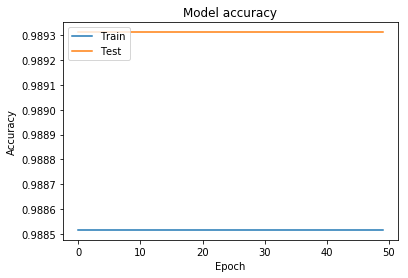

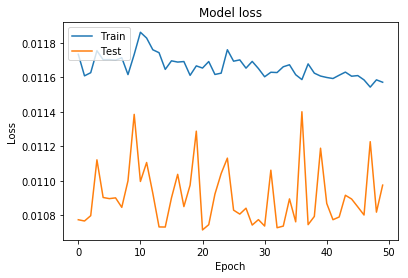

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100)               44400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
activation_1 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 44,501
Trainable params: 44,501
Non-trainable params: 0
_________________________________________________________________


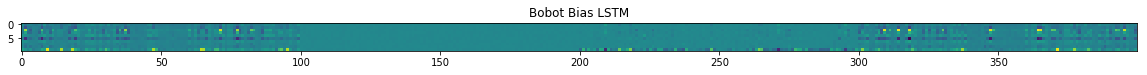

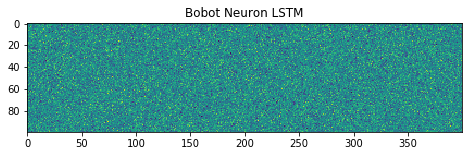

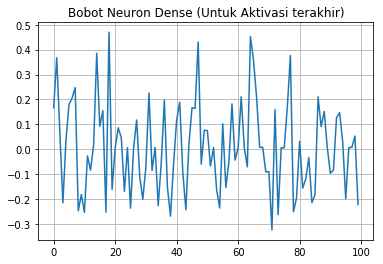

In [0]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

from matplotlib.pyplot import imshow
def plot_conv_weights(model, layer):
    W = model.get_layer(name=layer).get_weights()[0]
    if len(W.shape) == 4:
        W = np.squeeze(W)
        W = W.reshape((W.shape[0], W.shape[1], W.shape[2]*W.shape[3])) 
        fig, axs = plt.subplots(5,5, figsize=(8,8))
        fig.subplots_adjust(hspace = .5, wspace=.001)
        axs = axs.ravel()
        for i in range(25):
            axs[i].imshow(W[:,:,i])
            axs[i].set_title(str(i))

model.summary()
plt.figure(figsize = (20,2))
plt.imshow(model.layers[0].get_weights()[0], interpolation='nearest')
plt.title("Bobot Bias LSTM")
plt.show()
plt.figure(figsize = (20,2))
plt.imshow(model.layers[0].get_weights()[1], interpolation='nearest')
plt.title("Bobot Neuron LSTM")
plt.show()

plt.plot(model.layers[3].get_weights()[0])
plt.title("Bobot Neuron Dense (Untuk Aktivasi terakhir)")
plt.grid()
plt.show()

### Bukan Sentiment Analysis

In [0]:
import pandas as pd
# Proton, SrcAddrn, DstAddrn, Sportn, Dportn, Dirn, TotPktsn, TotBytesn, SrcBytesn, Labeln, Label_dual
datasetn = pd.DataFrame({
    'Proton':Proton[:,0],
    'SrcAddrn':SrcAddrn[:,0],
    'DstAddrn':DstAddrn[:,0],
    'Sportn':Sportn[:,0],
    'Dportn':Dportn[:,0],
    'Dirn':Dirn[:,0],
    'TotPktsn':TotPktsn[:,0],
    'TotBytesn':TotBytesn[:,0],
    'SrcBytesn':SrcBytesn[:,0],
    'Labeln':Labeln[:,0],
    'Label_dual':np.array(Label_dual)[:,0]
})

# pisah jadi train set and test set
values = datasetn.values
n_sample_train = 250000
train = values[:n_sample_train, :]
test = values[n_sample_train:, :]
train_X, train_y = train[:, :-1], train[:, :-1]
test_X, test_y = test[:, :-1], test[:, :-1]
train_X = train_X.reshape((train_X.shape[0],1,train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(250000, 1, 10) (250000, 10) (2574636, 1, 10) (2574636, 10)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 100)               44400     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
activation_2 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 45,410
Trainable params: 45,410
Non-trainable params: 0
_________________________________________________________________
Train on 250000 samples, validate on 2574636 samples
Epoch 1/50
 - 50s - loss: 0.1201 - acc: 0.4666 - mean_absolute_error: 0.1201 - categorical_accuracy: 0.4666 - val_loss: 0.0667 - val_acc: 0.6474 - val_mean_absolute_error: 0.0667 - val_categorical_accuracy: 0.6474
Epo

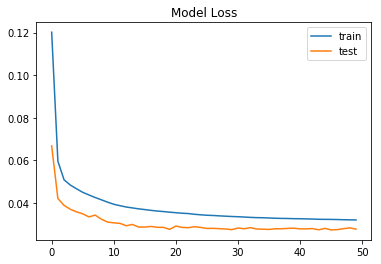

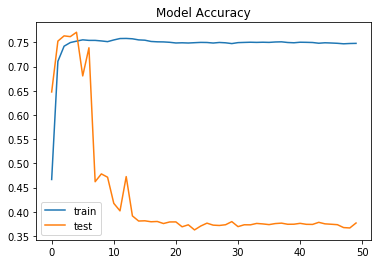

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 100)               44400     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
activation_2 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 45,410
Trainable params: 45,410
Non-trainable params: 0
_________________________________________________________________


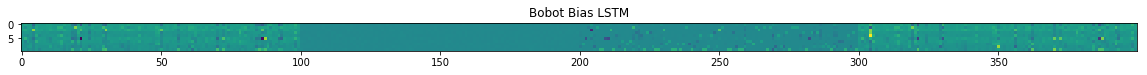

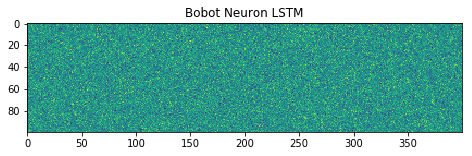

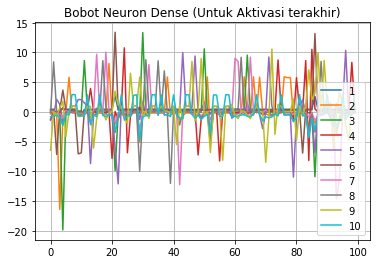

In [0]:
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense, Activation, TimeDistributed, Dropout, LSTM
from keras import optimizers
from keras import metrics
model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1],train_X.shape[2])))
model.add(Dropout(0.4))
# model.add(TimeDistributed(Dense(100)))
model.add(Activation('softmax'))
model.add(Dense(10))
optm = optimizers.Adam(lr=0.001, clipnorm=0.5)
model.compile(optimizer=optm,loss='mae',metrics=['accuracy', metrics.mae, metrics.categorical_accuracy])
model.summary()

# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
model.save_weights(bobotneris)
import pickle
with open(shisneris, 'wb') as file_pi:
        pickle.dump(history.history, file_pi)

from matplotlib.pyplot import imshow
def plot_conv_weights(model, layer):
    W = model.get_layer(name=layer).get_weights()[0]
    if len(W.shape) == 4:
        W = np.squeeze(W)
        W = W.reshape((W.shape[0], W.shape[1], W.shape[2]*W.shape[3])) 
        fig, axs = plt.subplots(5,5, figsize=(8,8))
        fig.subplots_adjust(hspace = .5, wspace=.001)
        axs = axs.ravel()
        for i in range(25):
            axs[i].imshow(W[:,:,i])
            axs[i].set_title(str(i))

import matplotlib.pyplot as plt
# # plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title("Model Loss")
plt.legend()
plt.show()

plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.title("Model Accuracy")
plt.legend()
plt.show()

model.summary()
plt.figure(figsize = (20,2))
plt.imshow(model.layers[0].get_weights()[0], interpolation='nearest')
plt.title("Bobot Bias LSTM")
plt.show()
plt.figure(figsize = (20,2))
plt.imshow(model.layers[0].get_weights()[1], interpolation='nearest')
plt.title("Bobot Neuron LSTM")
plt.show()

plt.plot(model.layers[3].get_weights()[0])
plt.title("Bobot Neuron Dense (Untuk Aktivasi terakhir)")
plt.legend([1,2,3,4,5,6,7,8,9,10])
plt.grid()
plt.show()

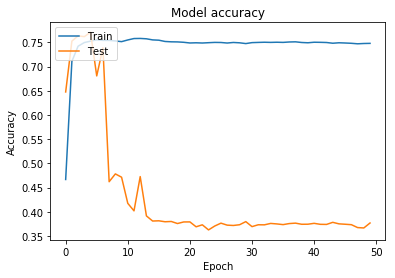

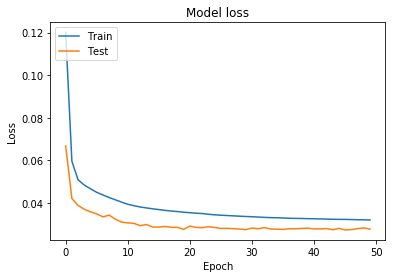

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 100)               44400     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
activation_2 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 45,410
Trainable params: 45,410
Non-trainable params: 0
_________________________________________________________________


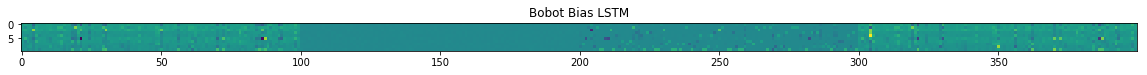

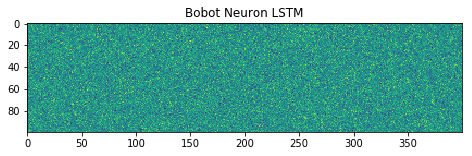

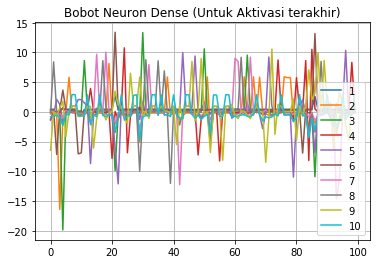

In [0]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

from matplotlib.pyplot import imshow
def plot_conv_weights(model, layer):
    W = model.get_layer(name=layer).get_weights()[0]
    if len(W.shape) == 4:
        W = np.squeeze(W)
        W = W.reshape((W.shape[0], W.shape[1], W.shape[2]*W.shape[3])) 
        fig, axs = plt.subplots(5,5, figsize=(8,8))
        fig.subplots_adjust(hspace = .5, wspace=.001)
        axs = axs.ravel()
        for i in range(25):
            axs[i].imshow(W[:,:,i])
            axs[i].set_title(str(i))

model.summary()
plt.figure(figsize = (20,2))
plt.imshow(model.layers[0].get_weights()[0], interpolation='nearest')
plt.title("Bobot Bias LSTM")
plt.show()
plt.figure(figsize = (20,2))
plt.imshow(model.layers[0].get_weights()[1], interpolation='nearest')
plt.title("Bobot Neuron LSTM")
plt.show()

plt.plot(model.layers[3].get_weights()[0])
plt.title("Bobot Neuron Dense (Untuk Aktivasi terakhir)")
plt.legend([1,2,3,4,5,6,7,8,9,10])
plt.grid()
plt.show()

# Load Data Historis

In [0]:
from keras.models import Sequential
import pickle
modellstmneris = Sequential()
modellstmrbot = Sequential()
modellstmsvchosta = Sequential()
hneris = pickle.load(open('/content/data/'))
hrbot = 
hsvchosta = 